In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools 
import seaborn as sns 
import matplotlib.pyplot as pyplot 
from statistics import mode 

In [11]:
adspend_trends = pd.read_csv('adspend.googletrends.weekly.csv', parse_dates = ['FIXED TIME'])

In [12]:
adspend_trends.set_index('FIXED TIME', inplace = True)

In [13]:
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL',
 'Unnamed: 0',
 'value',
 'onediffvalue',
 'TOTALdiff',
 'valuediff']

In [14]:
adspend_trends = adspend_trends.drop(columns = ['onediffvalue', 'Unnamed: 0', 'TOTALdiff', 'valuediff'])

In [15]:
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL',
 'value']

In [16]:
for acolumn in list(adspend_trends):
    adf_result = stattools.adfuller(adspend_trends[acolumn])
    print(adf_result[1])
#numbers less than 0.05 or 0.02 are stationary 

4.944569609526588e-09
0.06237188986361679
0.6888967165130822
0.5507690801310768
0.9967319472189904
5.200387873510148e-06
0.09667874305370416
0.7976617760666814
0.34853519025821755
4.858038849581863e-29
0.2744078405823607
0.24171083022075313
0.054267554962993916


In [17]:
#because some are not stationary, I will apply differencing to all variable 
adspend_trends_diff = pd.DataFrame()

In [18]:
#for acolumn in list(adspend_trends):
 #   columnname = 'is_diff' % (acolumn)
  #  adspend_trends_diff(columnname) = adspend_trends[acolumn].diff(1)

SyntaxError: can't assign to function call (<ipython-input-18-575cc1dfe56b>, line 3)

In [19]:
for acolumn in list(adspend_trends): 
    columnname = "%s_diff" % (acolumn) 
    adspend_trends_diff[columnname] = adspend_trends[acolumn].diff(1)

In [20]:
adspend_trends_diff.head()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SUNDAY MAGS_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-33.3,0.0,0.0,0.0,0.0,-105.7,0.0,0.0,-10.1,0.0,150.3,1.2,-300.817882
2013-10-21,-7.2,0.0,0.0,0.0,0.0,28.6,0.0,0.0,0.6,0.0,-134.4,-112.4,-541.177294
2013-10-28,-10.4,0.0,0.0,0.0,0.0,-101.1,0.0,233.0,11.2,0.0,47.0,179.8,-968.463065
2013-11-04,9.3,0.0,0.0,0.0,0.0,131.2,0.0,-233.0,-6.4,0.0,-110.8,-209.8,459.623576


In [22]:
for acolumn in list(adspend_trends_diff):
    adf_result = stattools.adfuller(adspend_trends_diff[acolumn].iloc[1:])
    print(adf_result[1])

2.737565394693417e-16
2.834615515519561e-14
8.44449296505387e-15
5.2624941219073705e-12
6.799586104486564e-06
4.097629531847151e-13
2.9107116033648535e-12
1.3630246836291944e-15
3.5528864600703405e-20
1.507821040229618e-13
1.8385816673648825e-17
7.158438380058312e-05
5.234505615611961e-10


In [24]:
correlationlist = []
for acolumn in list(adspend_trends_diff): 
    if 'value'not in acolumn: 
        corr = adspend_trends_diff[acolumn].corr(adspend_trends_diff['value_diff'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV_diff 0.22037153406889598
MAGAZINES_diff 0.05744505450045889
NAT SPOT RADIO_diff 0.016997649461892226
NATL NEWSP_diff 0.0031087842156899328
NETWORK RADIO_diff -0.011493852056803793
NETWORK TV_diff 0.0977805374960994
NEWSPAPER_diff 0.14996532007884594
OUTDOOR_diff 0.08811169210020817
SPOT TV_diff 0.003394777712884136
SUNDAY MAGS_diff 0.03898436962954251
SYNDICATION_diff 0.1305366708532623
TOTAL_diff 0.17996636383056985


In [25]:
np.mean(correlationlist)

0.08126407515762879

In [28]:
correlationlist = []
for acolumn in list(adspend_trends): 
    if 'value'not in acolumn: 
        corr = adspend_trends[acolumn].corr(adspend_trends['value'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV 0.21745737491816322
MAGAZINES 0.04487501228309064
NAT SPOT RADIO 0.0014309893233000162
NATL NEWSP -0.07612919690205967
NETWORK RADIO -0.03522310284411466
NETWORK TV 0.04013733492572933
NEWSPAPER 0.03754205192900637
OUTDOOR -0.09027713682412346
SPOT TV -0.12400652923541038
SUNDAY MAGS -0.019046458416145107
SYNDICATION 0.4956966482683107
TOTAL 0.07869191731914103


In [29]:
np.mean(correlationlist)

0.047595742062074

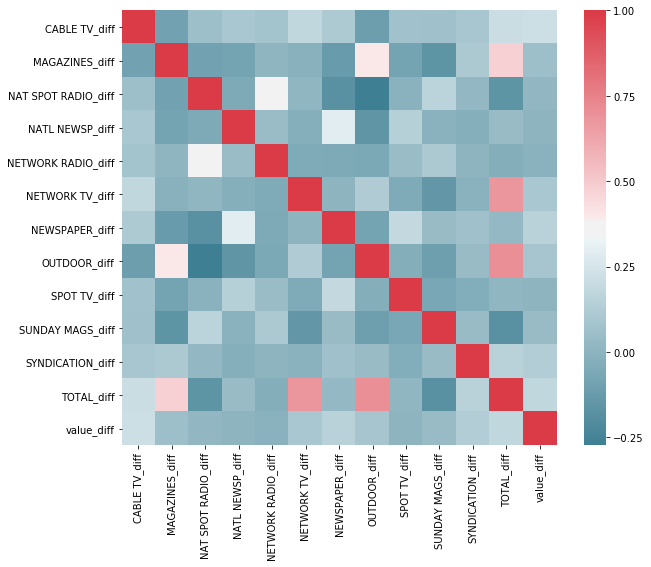

In [35]:
f, ax = pyplot.subplots(figsize=(10,8))
corr = adspend_trends_diff.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)




In [41]:
numofweeks = 8 
significantlags = [] 
for acolumn in list(adspend_trends_diff):
    if 'value' not in acolumn: 
        testframe = adspend_trends_diff[['value_diff', acolumn]]
        testframe = testframe.iloc[1:] #removing first row 
        results = stattools.grangercausalitytests(testframe, numofweeks, verbose = False)
        for week in range(1, numofweeks+1):
            if results[week][0]['params_ftest'][1]<0.05:
                print('%s is significant at %s weeks'%(acolumn, week))
                significantlags.append(week)
        

CABLE TV_diff is significant at 1 weeks
NAT SPOT RADIO_diff is significant at 1 weeks
NAT SPOT RADIO_diff is significant at 3 weeks
NAT SPOT RADIO_diff is significant at 4 weeks
NAT SPOT RADIO_diff is significant at 5 weeks
NAT SPOT RADIO_diff is significant at 6 weeks
NAT SPOT RADIO_diff is significant at 7 weeks
NAT SPOT RADIO_diff is significant at 8 weeks
NETWORK RADIO_diff is significant at 3 weeks
NETWORK RADIO_diff is significant at 4 weeks
NETWORK RADIO_diff is significant at 5 weeks
NETWORK RADIO_diff is significant at 6 weeks
NETWORK RADIO_diff is significant at 7 weeks
NETWORK RADIO_diff is significant at 8 weeks
OUTDOOR_diff is significant at 2 weeks
OUTDOOR_diff is significant at 5 weeks
SUNDAY MAGS_diff is significant at 2 weeks
SUNDAY MAGS_diff is significant at 3 weeks
SUNDAY MAGS_diff is significant at 4 weeks
SUNDAY MAGS_diff is significant at 5 weeks
SUNDAY MAGS_diff is significant at 6 weeks
SUNDAY MAGS_diff is significant at 7 weeks
SUNDAY MAGS_diff is significant 

In [42]:
mode(significantlags)

5

In [43]:
modelingdataset= adspend_trends_diff

In [44]:
modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SUNDAY MAGS_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,,
2018-09-03,-220.6,-645.5,49.3,0.0,-71.7,1342.4,-39.3,-2511.7,-114.9,0.0,0.0,-2212.0,816.729703
2018-09-10,-18.3,782.7,0.0,727.9,0.0,-28.2,-28.5,0.0,-51.9,0.0,0.0,1383.7,-2027.785341
2018-09-17,187.1,-259.4,0.0,-94.7,0.0,-1051.6,-7.8,0.0,14.0,0.0,7.3,-1205.2,1185.480262
2018-09-24,-180.5,-98.6,0.0,-595.5,0.0,943.4,2.7,0.0,162.2,0.0,56.7,290.4,-1083.758549
2018-10-01,59.1,470.5,-50.7,416.2,0.0,-1078.4,95.6,2763.9,-11.3,0.0,-64.0,2600.7,-1026.643115


In [50]:
date = pd.to_datetime('2018-10-08')
modelingdataset.loc[date] = np.nan

In [51]:
date = pd.to_datetime('2018-10-15')
modelingdataset.loc[date] = np.nan

In [49]:
for acolumn in list(modelingdataset):
    if 'value' not in acolumn: 
        for alag in range (1,3):
            columnname = '%s_lags%s'%(acolumn,alag)
            modelingdataset[columnname] = modelingdataset[acolumn].shift(alag)

In [53]:
modelingdataset.sort_index(axis =1, inplace = True)
modelingdataset.head()

,CABLE TV_diff,CABLE TV_diff_lags1,CABLE TV_diff_lags2,MAGAZINES_diff,MAGAZINES_diff_lags1,MAGAZINES_diff_lags2,NAT SPOT RADIO_diff,NAT SPOT RADIO_diff_lags1,NAT SPOT RADIO_diff_lags2,NATL NEWSP_diff,...,SUNDAY MAGS_diff,SUNDAY MAGS_diff_lags1,SUNDAY MAGS_diff_lags2,SYNDICATION_diff,SYNDICATION_diff_lags1,SYNDICATION_diff_lags2,TOTAL_diff,TOTAL_diff_lags1,TOTAL_diff_lags2,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-33.3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,NaN,150.3,NaN,NaN,1.2,NaN,NaN,-300.817882
2013-10-21,-7.2,-33.3,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,-134.4,150.3,NaN,-112.4,1.2,NaN,-541.177294
2013-10-28,-10.4,-7.2,-33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,47.0,-134.4,150.3,179.8,-112.4,1.2,-968.463065
2013-11-04,9.3,-10.4,-7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-110.8,47.0,-134.4,-209.8,179.8,-112.4,459.623576


In [55]:
modelingdataset.to_csv('google_adspend_differenced_lagged_fordatarobot.csv')